# Import and Query Data

In [1]:
import sqlite3
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

conn = sqlite3.connect('factbook.db')

query = 'SELECT * FROM facts WHERE (area_land !=0  AND population !=0 AND population_growth !=0 );'

factbook_df = pd.read_sql_query (sql = query, con = conn)
factbook_df = factbook_df.dropna(axis = 0)
factbook_df.set_index('name', inplace = True)

# Countries with Top 5 Populations

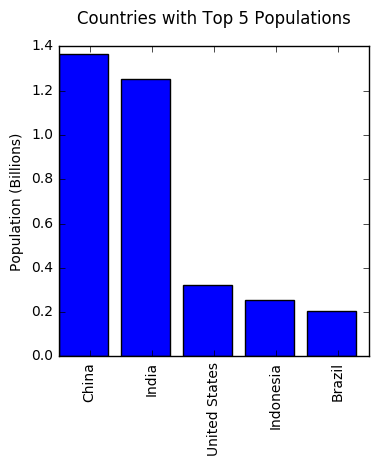

In [2]:
#Plot top 5 population countries

factbook_df = factbook_df.sort_values(by ='population', ascending = False)

fig = plt.figure(figsize = (4,4))

plt.bar ( left = range(0,5), height = factbook_df['population'][0:5]/1e9)
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
plt.ylabel('Population (Billions)')
plt.title('Countries with Top 5 Populations', y = 1.05)
plt.show()

Initial Analysis: As expected, China and India lead with the 2 highest population counts. US is at 3rd with at least 800,000 less population. 

# 2050 Population Extrapolation

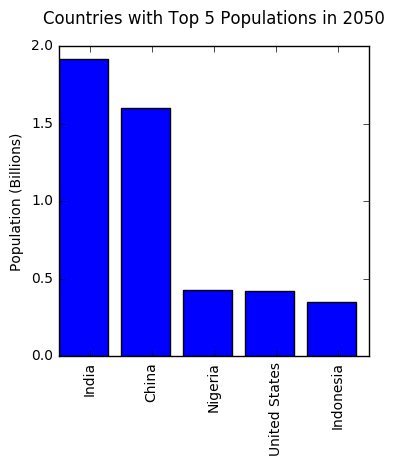

In [3]:
#Calculate population in 2050


def population2050 (x):
   return x['population']*math.exp(x['population_growth']/100*35)

pop_col = factbook_df.apply(population2050, axis = 1)
factbook_df['population_2050'] = pop_col

factbook_df = factbook_df.sort_values(by ='population_2050', ascending = False)

fig = plt.figure(figsize = (4,4))
plt.bar ( left = range(0,5), height = factbook_df['population_2050'][0:5]/1e9)
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
plt.ylabel('Population (Billions)')
plt.title('Countries with Top 5 Populations in 2050', y=1.05)
plt.show()

Initial Analysis: As projected by current population growth rates, India will have surpassed China by 2050. Nigeria, which wasn't in the top 5 before, will surpass US and reach 3rd place. 

# Land/Water Ratio of Countries

In [4]:
# Calculate land:water ratio of CIA World Factbook countries 
land_query = 'SELECT SUM(area_land) FROM facts WHERE area_land !=0 AND area_land != "";'
water_query = 'SELECT SUM(area_water) FROM facts WHERE area_water !=0 AND area_water !="";'
land_total = pd.read_sql_query (sql = land_query, con = conn)
land_total = land_total.dropna(axis = 0)
land_total = land_total['SUM(area_land)'][0]

water_total = pd.read_sql_query (sql = water_query, con = conn)
water_total = water_total.dropna(axis = 0)
water_total = water_total['SUM(area_water)'][0]


land_water_ratio = (land_total)/(water_total)
total_area = land_total + water_total
land_per = land_total / total_area
water_per = water_total / total_area

print ('Total Land Area:', land_total, 'km^2')
print ('Total Water Area:', water_total , 'km^2')
print ('Land/Water Ratio:', land_water_ratio)

Total Land Area: 128584834 km^2
Total Water Area: 4633425 km^2
Land/Water Ratio: 27.7515734041


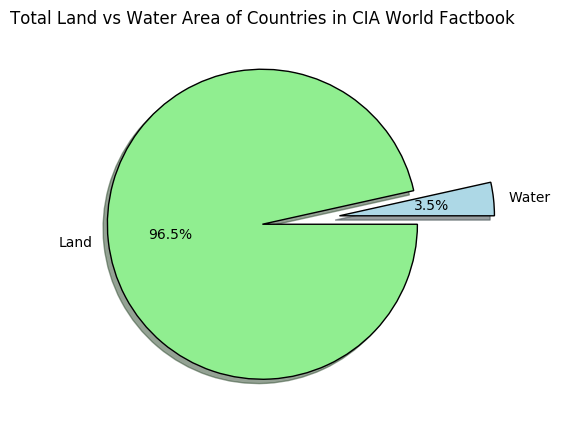

In [5]:
fig = plt.figure(figsize = (5,5))
plt.pie([water_total, land_total], labels = ['Water', 'Land'], shadow = True, explode = [0.5,0], autopct='%1.1f%%', colors = ['lightblue', 'lightgreen'])
plt.title('Total Land vs Water Area of Countries in CIA World Factbook')
plt.show()

Initial Analysis: In total, countries on earth have much more land area than water coverage. Note that this is not considering the Earth as a whole, where we know the majority coverage is water. 

# Population Density

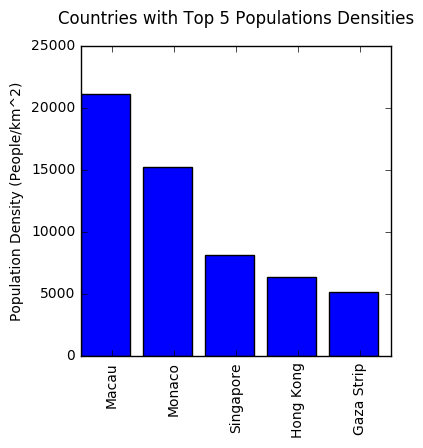

In [6]:
factbook_df['population_density'] = factbook_df['population']/ factbook_df['area']

factbook_df = factbook_df.sort_values(by ='population_density', ascending = False)

fig = plt.figure(figsize = (4,4))
plt.bar ( left = range(0,5), height = factbook_df['population_density'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
plt.ylabel('Population Density (People/km^2)')
plt.title('Countries with Top 5 Populations Densities', y=1.05)
plt.show()

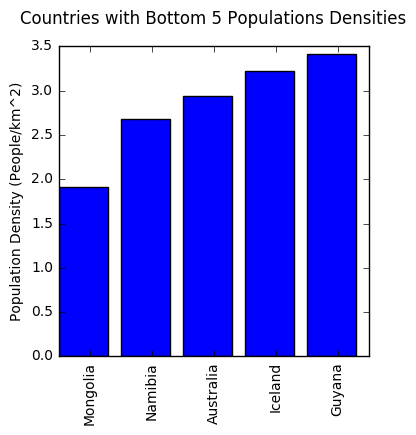

In [7]:
factbook_df = factbook_df.sort_values(by ='population_density', ascending = True)

fig = plt.figure(figsize = (4,4))
plt.bar ( left = range(0,5), height = factbook_df['population_density'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
plt.ylabel('Population Density (People/km^2)')
plt.title('Countries with Bottom 5 Populations Densities', y=1.05)
plt.show()

# Population Density in 2015 vs 2050

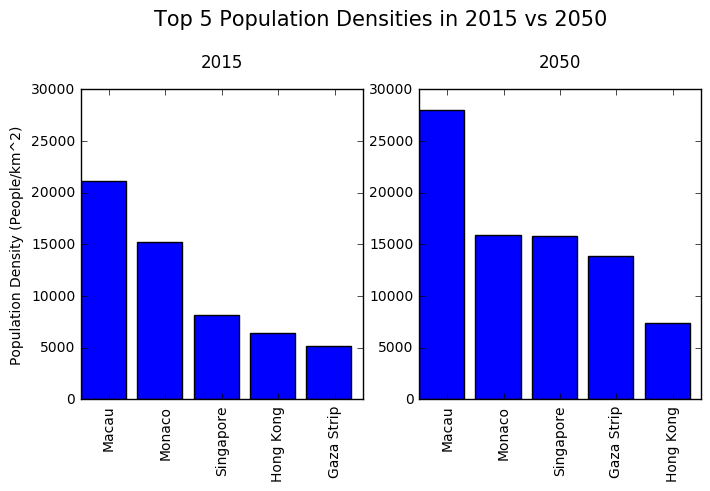

In [8]:
factbook_df['population_density_2050'] = factbook_df['population_2050']/ factbook_df['area']

factbook_df = factbook_df.sort_values(by ='population_density', ascending = False)

fig = plt.figure(figsize = (8,4))
fig.suptitle('Top 5 Population Densities in 2015 vs 2050', y = 1.1, size = 15)

sub1 = fig.add_subplot(121)
sub1.bar ( left = range(0,5), height = factbook_df['population_density'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
sub1.set_ylabel('Population Density (People/km^2)')
sub1.set_ylim([0,30000])
sub1.set_title('2015', y=1.05)


factbook_df = factbook_df.sort_values(by ='population_density_2050', ascending = False)
sub2 = fig.add_subplot(122)
sub2.bar ( left = range(0,5), height = factbook_df['population_density_2050'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
sub2.set_title('2050', y=1.05)
plt.show()

Initial Analysis: In 2050, Macau is projected to reach ~27000 people/km^2. Singapore is expected to catch up to Monaco. Gaza Strip surpasses Hong Kong.

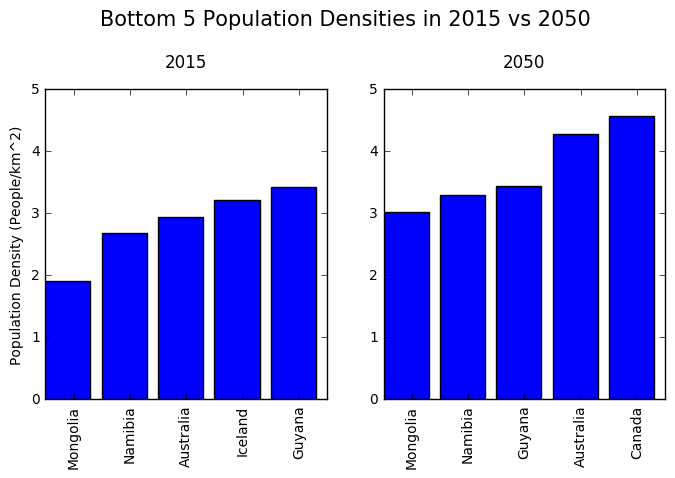

In [9]:
factbook_df = factbook_df.sort_values(by ='population_density', ascending = True)

fig = plt.figure(figsize = (8,4))
fig.suptitle('Bottom 5 Population Densities in 2015 vs 2050', y = 1.1, size = 15)

sub1 = fig.add_subplot(121)
sub1.bar ( left = range(0,5), height = factbook_df['population_density'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
sub1.set_ylabel('Population Density (People/km^2)')
sub1.set_ylim([0,5])
sub1.set_title('2015', y=1.05)

factbook_df = factbook_df.sort_values(by ='population_density_2050', ascending = True)

sub2 = fig.add_subplot(122)
sub2.bar ( left = range(0,5), height = factbook_df['population_density_2050'][0:5])
plt.xticks( np.arange(0.5,5.5,1), factbook_df[0:5].index, rotation = 90)
sub2.set_title('2050', y=1.05)
plt.show()

Initial Analysis: Surprisingly, Canada will reach the bottom 5th population density in 2050. Iceland will be removed from the list. 